In [3]:
# 6.34

from math import erfc, sqrt

Max_Err_Prob = 10e-5
Es_N0 = 1

def compute_probability(Es_No):
    """Gives the probability of error for a given Es/No"""
    sum =  48/16 * erfc(sqrt(4  * Es_N0 / 20))
    sum += 36/16 * erfc(sqrt(8  * Es_N0 / 20))
    sum += 32/16 * erfc(sqrt(16 * Es_N0 / 20))
    sum += 48/16 * erfc(sqrt(20 * Es_N0 / 20))
    sum += 16/16 * erfc(sqrt(32 * Es_N0 / 20))
    sum += 16/16 * erfc(sqrt(36 * Es_N0 / 20))
    sum += 24/16 * erfc(sqrt(40 * Es_N0 / 20))
    sum += 16/16 * erfc(sqrt(52 * Es_N0 / 20))
    sum += 4/16  * erfc(sqrt(72 * Es_N0 / 20))

    return sum


probability = compute_probability(Es_N0)

while abs(probability - Max_Err_Prob) > 0.0001:
    half_way = Es_N0 / 2
    if probability > Max_Err_Prob:
        Es_N0 += half_way
    else:
        Es_N0 -+ half_way

    probability = compute_probability(Es_N0)
print(Es_N0)


57.6650390625


In [4]:
# Problem 3 reproduce K1 and K2

def compute_K1_K2(BnT, Z, K0, Kp):
    K0_Kp_K1 = (4 * Z * BnT / (Z + 1 / (4 * Z)))  / (1 + 2 * Z * BnT / (Z + 1 / (4 * Z)) + (BnT / (Z + 1 / (4 * Z)))**2)
    K0_Kp_K2 = (4 * (BnT / (Z + 1 / (4 * Z)))**2) / (1 + 2 * Z * BnT / (Z + 1 / (4 * Z)) + (BnT / (Z + 1 / (4 * Z)))**2)

    K1 = K0_Kp_K1 / (K0 * Kp)
    K2 = K0_Kp_K2 / (K0 * Kp)

    return K1, K2

BnT = 0.5
Z = 1 / sqrt(2)
Kp = 1
K0 = 5.66
K1, K2 = compute_K1_K2(BnT, Z, K0, Kp)

print(f"C.2.1: K1 = {K1}; K2 = {K2}")

BnT = 0.05
K0 = 0.5
K1, K2 = compute_K1_K2(BnT, Z, K0, Kp)

print(f"C.2.3: K1 = {K1}; K2 = {K2}")

C.2.1: K1 = 0.12471419663271667; K2 = 0.08314279775514448
C.2.3: K1 = 0.2494802494802495; K2 = 0.016632016632016636


K1 0.09876543209876543 K2 0.07901234567901236


/home/calvin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


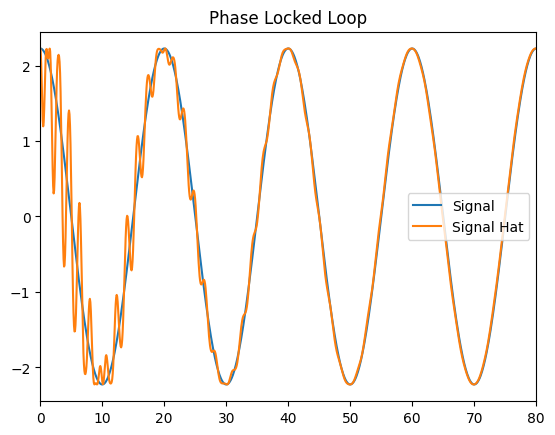

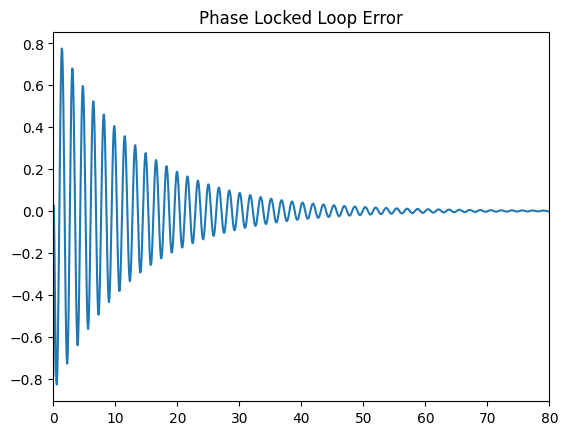

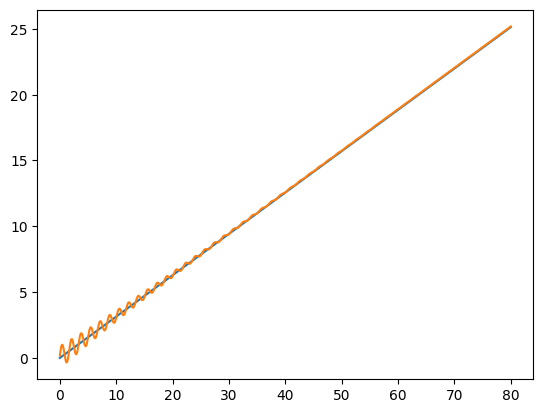

In [5]:
# C.2.4

from math import pi, atan, e
from numpy import linspace
import matplotlib.pyplot as plt

N = linspace(0, 80, 1000)
Omega0 = 2 * pi / 20
BnT = 1
Z = 1
Theta_n = BnT / (Z + 1/(4 * Z))
Kp = 1
K0 = 10
K1, K2 = compute_K1_K2(BnT, Z, K0, Kp)
print(f"K1 {K1} K2 {K2}")
signal = []
signal_hat = [complex(1,1)]
theta_error = []
v = []
z1 = 0
z2 = 0
omegas = []
z2s = []

for n in N:
    # Phase Detector
    signal.append(e**(complex(Theta_n, Omega0*n)))
    omegas.append(Omega0*n)
    added_signal = signal[-1] * signal_hat[-1].conjugate()
    theta_error.append(atan(added_signal.imag/added_signal.real))
    # print(theta_error[-1])

    # Loop Filter
    first = K1 * theta_error[-1]
    second = (K2 * theta_error[-1]) + z1
    z1 = second
    v.append(first + second)

    # DDS
    signal_hat.append(e**(complex(Theta_n,z2)))
    z2 = v[-1] + z2 + Omega0
    z2s.append(z2)
    
plt.figure()
plt.plot(N,signal)
signal_hat.pop(0)
plt.plot(N,signal_hat)
plt.legend(["Signal", "Signal Hat"])
plt.title("Phase Locked Loop")
plt.xlim([0, max(N)])
# plt.ylim([-2.5, 2.5])
plt.show()

plt.figure()
plt.xlim([0, max(N)])
plt.plot(N, theta_error)
plt.title("Phase Locked Loop Error")
plt.show()

plt.figure()
plt.plot(N, omegas)
plt.plot(N, z2s)
plt.show()



K1 0.019753086419753086 K2 0.01580246913580247


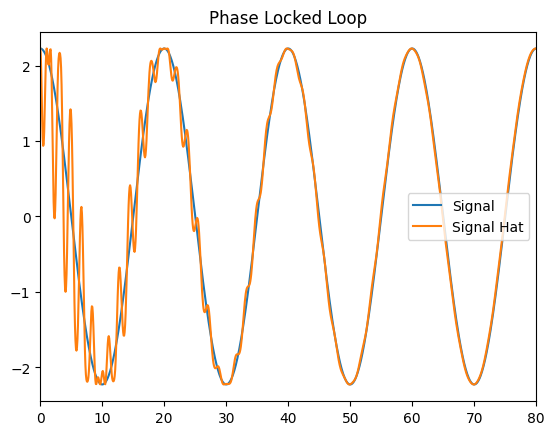

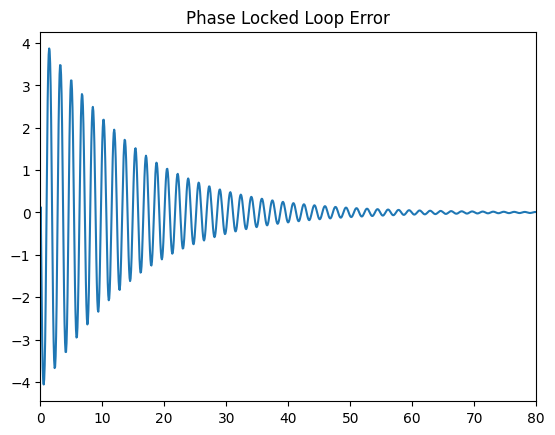

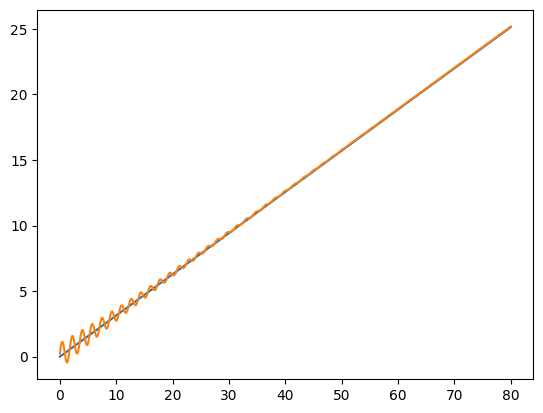

In [6]:
# C.2.5

from math import cos, sin, pi, e
from numpy import linspace
import matplotlib.pyplot as plt

N = linspace(0, 80, 1000)
Omega0 = 2 * pi / 20
BnT = 1
Z = 1
Theta_n = BnT / (Z + 1/(4 * Z))
Kp = 1
K0 = 50
K1, K2 = compute_K1_K2(BnT, Z, K0, Kp)
print(f"K1 {K1} K2 {K2}")
signal = []
signal_hat = [complex(1,1)]
theta_error = []
v = []
z1 = 0
z2 = 0
omegas = []
z2s = []


for n in N:
    # Phase Detector
    signal.append(e**(complex(Theta_n, Omega0*n)))
    omegas.append(Omega0*n)
    added_signal = signal[-1] * signal_hat[-1].conjugate()
    theta_error.append(added_signal.imag)
    # print(theta_error[-1])

    # Loop Filter
    first = K1 * theta_error[-1]
    second = (K2 * theta_error[-1]) + z1
    z1 = second
    v.append(first + second)

    # DDS
    signal_hat.append(e**(complex(Theta_n,z2)))
    z2 = v[-1] + z2 + Omega0
    z2s.append(z2)
    
plt.figure()
plt.plot(N,signal)
signal_hat.pop(0)
plt.plot(N,signal_hat)
plt.legend(["Signal", "Signal Hat"])
plt.title("Phase Locked Loop")
plt.xlim([0, max(N)])
# plt.ylim([-2.5, 2.5])
plt.show()

plt.figure()
plt.xlim([0, max(N)])
plt.plot(N, theta_error)
plt.title("Phase Locked Loop Error")
plt.show()

plt.figure()
plt.plot(N, omegas)
plt.plot(N, z2s)
plt.show()


K1 0.02906832298136646 K2 0.017888198757763974


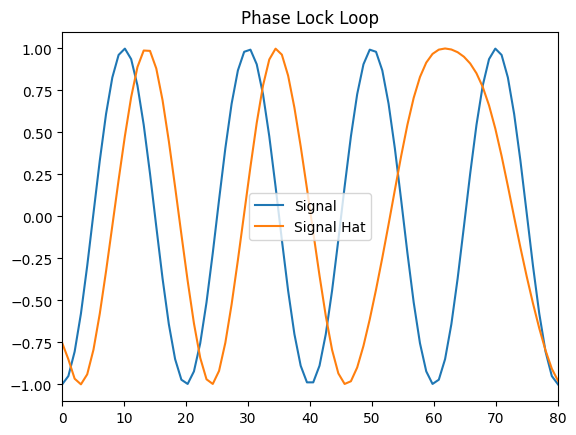

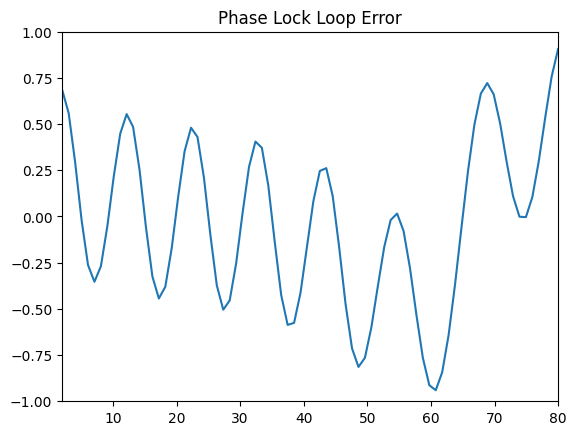

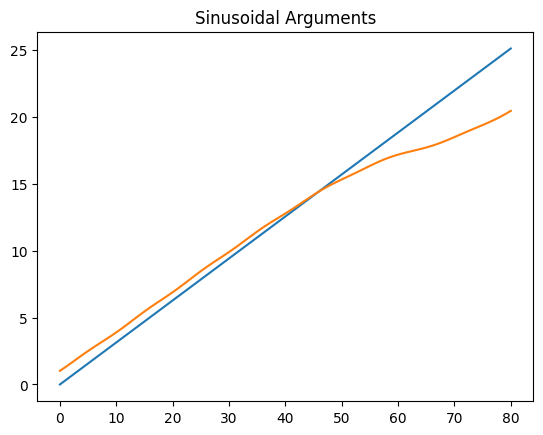

In [51]:
#C.2.8
from math import pi, e, sqrt
A = 1
Omega0 = 2 * pi / 20
BnT = 0.5
Z = 0.75 #1 / sqrt(2)
Theta_n = pi#BnT / (Z + 1/(4 * Z))
Kp = 1
K0 = 25
K1, K2 = compute_K1_K2(BnT, Z, K0, Kp)
print(f"K1 {K1} K2 {K2}")
N = linspace(0,80,80)

signal = []
signal_hat = [pi]
signal_error = []
z1 = 0
z2 = 0.85
v = []
out = []
omegas = []
z2s = []

for n in N:
    #Phase Detector
    signal.append(A * cos((Omega0 * n) + Theta_n))
    omegas.append(Omega0*n)
    signal_error.append(signal[-1] * signal_hat[-1])

    # Loop Filter
    first = K1 * signal_error[-1]
    second = (K2 * signal_error[-1]) + z1
    z1 = second
    v.append(first + second)

    # DDS
    out.append(cos(z2))
    signal_hat.append(-sin(z2))
    z2 = Omega0 + v[-1] + z2
    z2s.append(z2)

signal_hat.pop(0)

# plt.figure()
# plt.plot(N, temp)
# plt.show()

plt.figure()
plt.clf()
plt.plot(N, signal)
plt.plot(N, signal_hat)
plt.title("Phase Lock Loop")
plt.xlim([0,max(N)])
plt.legend(["Signal", "Signal Hat"])
plt.show()

plt.figure()
plt.title("Phase Lock Loop Error")
plt.plot(N, signal_error)
plt.xlim([2,max(N)])
plt.ylim([-1,1])
plt.show()

plt.figure()
plt.plot(N, omegas)
plt.plot(N, z2s)
plt.title("Sinusoidal Arguments")
plt.show()


In [12]:
# Distance calc
from math import sqrt

one = 6
two = 6

distance = (one*one) + (two*two)
print(distance) 

72
